In [26]:
# Installing required dependencies
!pip install opencv-python-headless matplotlib ultralytics

import torch
print(torch.__version__)  # To Check PyTorch version


2.6.0+cu124


In [27]:
from google.colab import files

uploaded = files.upload()
# This will allow us to upload a video file (e.g., mp4) locally


Saving IMG_3148.MOV to IMG_3148 (1).MOV


In [28]:
from ultralytics import YOLO

# Load pre-trained model (you can also train your own)
model = YOLO("yolov8n.pt")  # Use yolov8m.pt or yolov8l.pt for better accuracy


In [29]:
import cv2
import os

video_path = list(uploaded.keys())[0]
cap = cv2.VideoCapture(video_path)
out_frames = []

frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)  # Run object detection
    annotated_frame = results[0].plot()  # Draw boxes

    out_frames.append(annotated_frame)
    frame_count += 1
    if frame_count > 100:  # Limit to first 100 frames for demo
        break

cap.release()



0: 384x640 (no detections), 247.0ms
Speed: 5.3ms preprocess, 247.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 217.6ms
Speed: 4.6ms preprocess, 217.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 475.2ms
Speed: 8.1ms preprocess, 475.2ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 491.1ms
Speed: 14.5ms preprocess, 491.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 134.4ms
Speed: 4.4ms preprocess, 134.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 142.0ms
Speed: 5.1ms preprocess, 142.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 142.6ms
Speed: 4.9ms preprocess, 142.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 140.6ms
Speed: 4.4ms prep

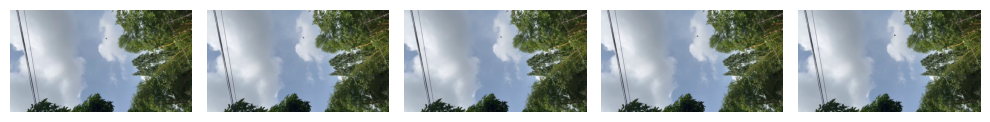

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.cvtColor(out_frames[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.tight_layout()
plt.show()


In [10]:
height, width, _ = out_frames[0].shape
output_path = "output_annotated.mp4"
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), 20, (width, height))

for frame in out_frames:
    out.write(frame)
out.release()

# Download the result
from google.colab import files
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>